In [19]:
import pandas as pd
import json
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns

In [86]:
df = pd.read_csv('csv_outputs/essay_scores_aggregated.csv')
sorted_df = df.sort_values(by='id')  # Replace 'column_name' with the actual column name
sorted_df.to_csv('csv_outputs/essay_scores_aggregated.csv', index=False)

In [15]:
df.describe()

,id,temperature,prompt,intro,effect,negotiation,feedback,conclusion,total
count,252.000000,252.000000,252.0,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,15.500000,0.844444,1.0,9.242063,28.456349,27.884921,18.496032,8.583333,92.662698
std,8.749502,0.386950,0.0,0.558292,0.933058,1.335484,0.844471,0.854447,4.220199
min,1.000000,0.100000,1.0,7.000000,25.000000,27.000000,18.000000,8.000000,85.000000
25%,8.500000,0.500000,1.0,9.000000,28.000000,27.000000,18.000000,8.000000,90.000000
50%,15.500000,1.000000,1.0,9.000000,28.000000,27.000000,18.000000,8.000000,90.000000
75%,22.500000,1.000000,1.0,10.000000,29.000000,30.000000,19.000000,9.000000,96.000000
max,30.000000,1.500000,1.0,10.000000,30.000000,30.000000,20.000000,10.000000,100.000000


In [ ]:
"""AI Graders"""
# gpt-4o - [temperature = 1.0, 0.5, 0.1, 1.5]
# gpt-4o-mini - [temperature = 1.0]
# claude-3-5-sonnet-20241022 - [temperature = 1.0]
# gemini-1.5-flash - [temperature = 1.0]
# cograder

# Note: the filtered_df look at (gpt-4o, claude, gemini, cograder)

"""Human Grader"""
# manual

In [88]:
target_models = ['gpt-4o', 'claude-3-5-sonnet-20241022', 'gemini-1.5-flash', ]

filtered_df = df[((df['model'].isin(target_models)) & (df['temperature'] == 1.0)) | ((df['company'] == 'cograder') & (df['model'] == 'ai-rubric') | (df['company'] == 'human'))]
print(filtered_df)


     id company                       model  temperature  prompt  intro  \
0     1  openai                      gpt-4o          1.0     1.0    9.0   
4     1  claude  claude-3-5-sonnet-20241022          1.0     1.0   10.0   
7     1  gemini            gemini-1.5-flash          1.0     1.0    9.0   
9     2  gemini            gemini-1.5-flash          1.0     1.0    7.0   
15    2  openai                      gpt-4o          1.0     1.0    9.0   
..   ..     ...                         ...          ...     ...    ...   
359  26   human                      manual          NaN     NaN    NaN   
360  27   human                      manual          NaN     NaN    NaN   
361  28   human                      manual          NaN     NaN    NaN   
362  29   human                      manual          NaN     NaN    NaN   
363  30   human                      manual          NaN     NaN    NaN   

     effect  negotiation  feedback  conclusion  total  \
0      28.0         27.0      18.0        

In [89]:
filtered_df = filtered_df.sort_values(by='id')
filtered_df.head()

,id,company,model,temperature,prompt,intro,effect,negotiation,feedback,conclusion,total,comment
0,1,openai,gpt-4o,1.0,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay effectively outlines the importance...
4,1,claude,claude-3-5-sonnet-20241022,1.0,1.0,10.0,30.0,30.0,20.0,10.0,100,Exceptional essay that demonstrates deep under...
7,1,gemini,gemini-1.5-flash,1.0,1.0,9.0,28.0,27.0,18.0,8.0,90,This is a well-written essay demonstrating a g...
336,1,human,manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN
280,1,cograder,ai-rubric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,NaN


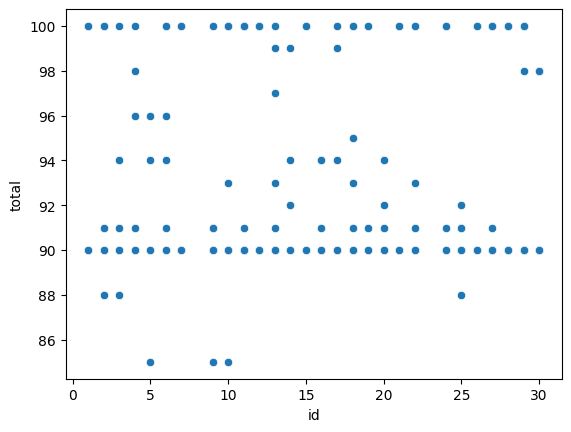

In [35]:
sns.scatterplot(x="id", y="total", data=df);

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_87734/708156244.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df['id'], y=filtered_df['total'], showmeans=True,


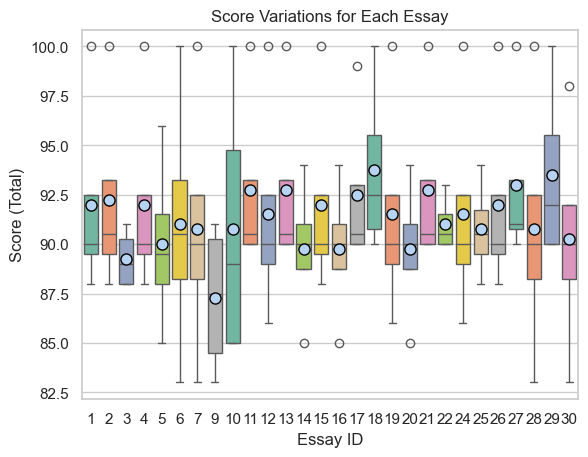

In [63]:
sns.boxplot(x=filtered_df['id'], y=filtered_df['total'], showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "#B7D3F2", "markeredgecolor": "black", "markersize": 8},
        palette="Set2")

# name the x-axis: essay id
# name the y-axis: total score
# add a title: Score Variation between GPT, Claude, Gemini, Cograder
plt.xlabel('Essay ID')
plt.ylabel('Score (Total)')
plt.title('Score Variations for Each Essay')
plt.savefig('score_variation_per_essay.png', format='png')

# Show the plot
plt.show()

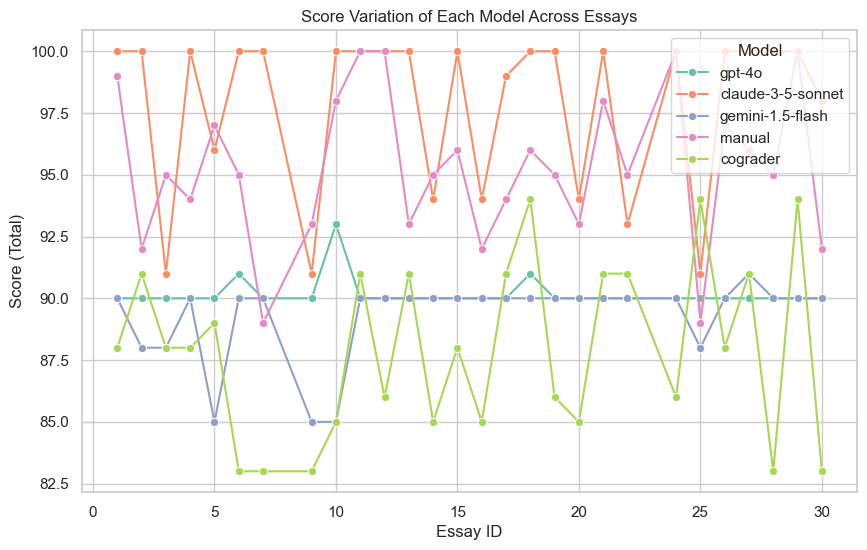

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping the names (example dictionary, adjust as needed)
name_mapping = {'ai-rubric': 'cograder', 'claude-3-5-sonnet-20241022': 'claude-3-5-sonnet'}

# Modify the 'model' column in the DataFrame to reflect the new naming
filtered_df['model'] = filtered_df['model'].replace(name_mapping)

# Define a custom color palette
custom_palette = {
    'cograder': '#1f77b4',  # Blue
    'claude-3-5-sonnet': '#2ca02c'  # Green
}

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.lineplot(
    data=filtered_df,
    x='id',
    y='total',
    hue='model',
    marker='o',
    palette="Set2"  # Apply the custom color palette
)

# Customize plot
plt.title('Score Variation of Each Model Across Essays')
plt.xlabel('Essay ID')
plt.ylabel('Score (Total)')
plt.legend(title='Model', loc='upper right')  # Adjust legend location
plt.savefig('score_variation_per_model.png', format='png')

# Show the plot
plt.show()



In [69]:
gpt = df[(df['company'] == 'openai') & (df['model'] == 'gpt-4o')]
gpt = gpt.sort_values(by='id')
gpt.head()

,id,company,model,temperature,prompt,intro,effect,negotiation,feedback,conclusion,total,comment
0,1,openai,gpt-4o,1.0,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay effectively outlines the importance...
1,1,openai,gpt-4o,0.5,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay effectively outlines the significan...
2,1,openai,gpt-4o,0.1,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay effectively outlines the significan...
5,1,openai,gpt-4o,1.5,1.0,9.0,28.0,27.0,18.0,8.0,90,You’ve done a solid job outlining the signific...
11,2,openai,gpt-4o,1.5,1.0,9.0,28.0,27.0,18.0,8.0,90,Your essay addresses the complexities and nuan...


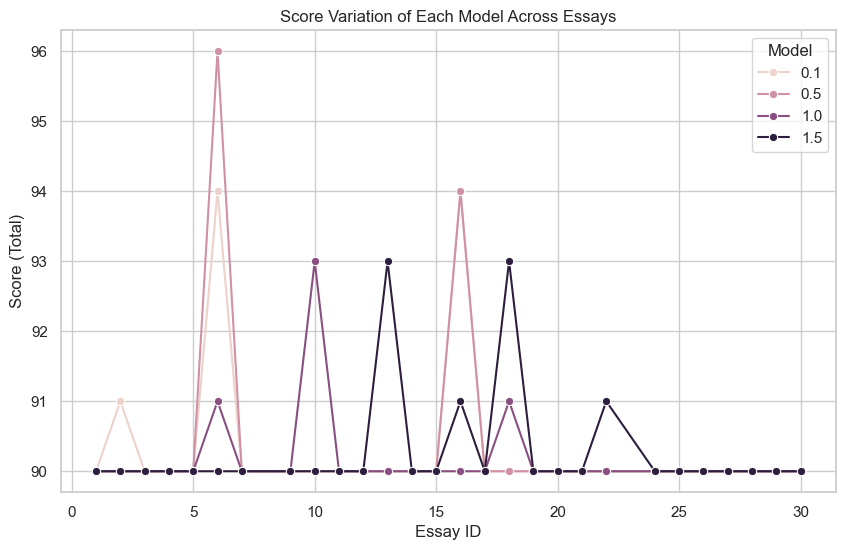

In [71]:
# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.lineplot(
    data=gpt,
    x='id',
    y='total',
    hue='temperature',
    marker='o'
)

# Customize plot
plt.title('Score Variation of Each Model Across Essays')
plt.xlabel('Essay ID')
plt.ylabel('Score (Total)')
plt.legend(title='Model', loc='upper right')  # Adjust legend location
#plt.savefig('score_variation_per_model.png', format='png')

# Show the plot
plt.show()


<Axes: xlabel='id', ylabel='total'>

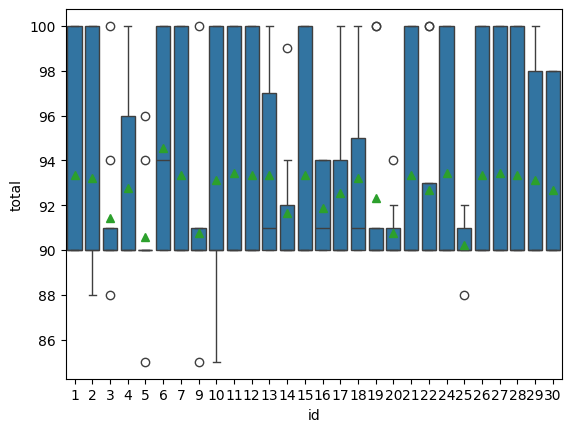

In [32]:
sns.boxplot(x=df['id'], y=df['total'], showmeans=True)